## Data Preparation
#### Nesta fase os dados foram preparados para integração em modelos de machine learning na fase de Modeling
#### As séries temporais "male", "female", "young" e "adult" foram retiradas dos dados uma vez que o nosso objetivo é orientado para a série "all"
#### A coluna "date" também foi removida porque apenas serve para nos situarmos no tempo, para a divisão dos dados em antigos=treino, recentes=teste. Além disso a sua natureza única (única por observação) apenas iria trazer incerteza para os modelos.
#### Para lidar com os valores outliers foram criados 2 cenários:
<ul>
    <li><b>Com outliers</b> - Neste cenário os valores outliers não foram tratados</li>
    <li><b>Sem outliers s/ compensação</b> - Neste cenário os valores outliers foram tratados</li>

</ul>

#### Por fim os dados de cada cenário foram exportados para os respetivos ficheiros csv para poderem ser utilizados nas fases seguintes 

In [4]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [80]:
# Importar os dados
data <- read.csv(file = '../data/store.csv', sep = ';')
head(data)

date,all,female,male,young,adult,weather,maxtemp,RH,maxwind
2013-04-09,2332,1115,1108,1122,1210,Rain,13,87,0
2013-04-10,2801,1217,1459,1239,1562,Rain,14,94,45
2013-04-11,2375,1168,1099,1059,1316,Rain,14,82,55
2013-04-12,3447,1617,1651,1606,1841,Sunny,13,78,0
2013-04-13,4823,2469,2117,2318,2505,Rain,16,81,37
2013-04-14,4978,2564,2223,2289,2689,Rain,16,73,0


In [81]:
# Remover a data e restantes séries temporais do dataframe 
# (ter cuidado com o metodo profet) / saber se é feriado pode ser util ou o dia da semana
data <- data %>%
    select(-date,-female,-male,-young,-adult)

# Substituir a variavel categórica weather por 0=RAIN e 1=SUNNY 
data$weather <- ifelse(data$weather=="Rain", 0, 1)

# Tratar outliers (fazer os cenarios)
# cenario 1 - com os outliers
# cenario 2 - sem os outliers
# cenario 3 - com definicao dos feriados c/ outliers
# cenario 4 - com definicao dos feriados s/ outliers
# cenario 5 - com feriados e definicao de dias(segunda, terça...domingo) c outliers
# cenario 6 - com feriados e definicao de dias(segunda, terça...domingo) s outliers

# o resto das time series no fim


# Ver como ficou o dataframe
head(data)

all,weather,maxtemp,RH,maxwind
2332,0,13,87,0
2801,0,14,94,45
2375,0,14,82,55
3447,1,13,78,0
4823,0,16,81,37
4978,0,16,73,0


In [77]:
summary(data$all) # mean = 3648

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    375    2569    3643    3648    4314   15735 

### Cenario 2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    375    2569    3643    3648    4314   15735 

[1]  7961  9371  9163  8300  8270 15735  7719 11110

nº outliers: 8

,all,weather,maxtemp,RH,maxwind
117,7961,1,21,68,42
118,9371,1,22,66,0
129,9163,1,26,70,32
141,8300,1,23,66,34
178,8270,0,20,84,0
181,15735,1,21,68,39
222,7719,1,10,63,50
250,11110,0,13,83,48


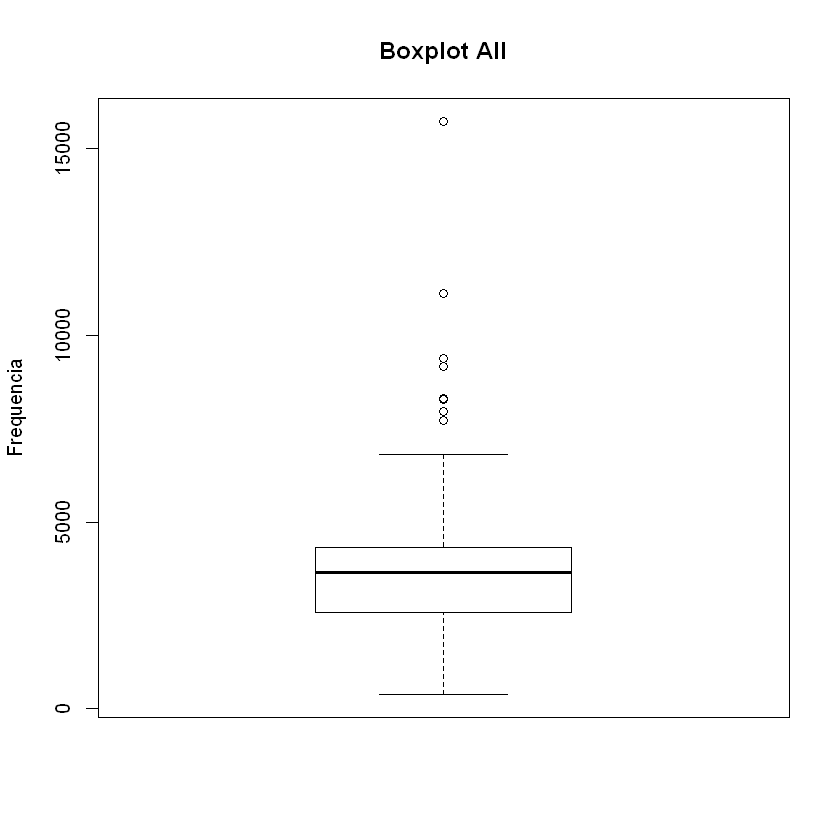

[1] 6804

nº outliers: 1

,all,weather,maxtemp,RH,maxwind
249,6804,0,13,94,29


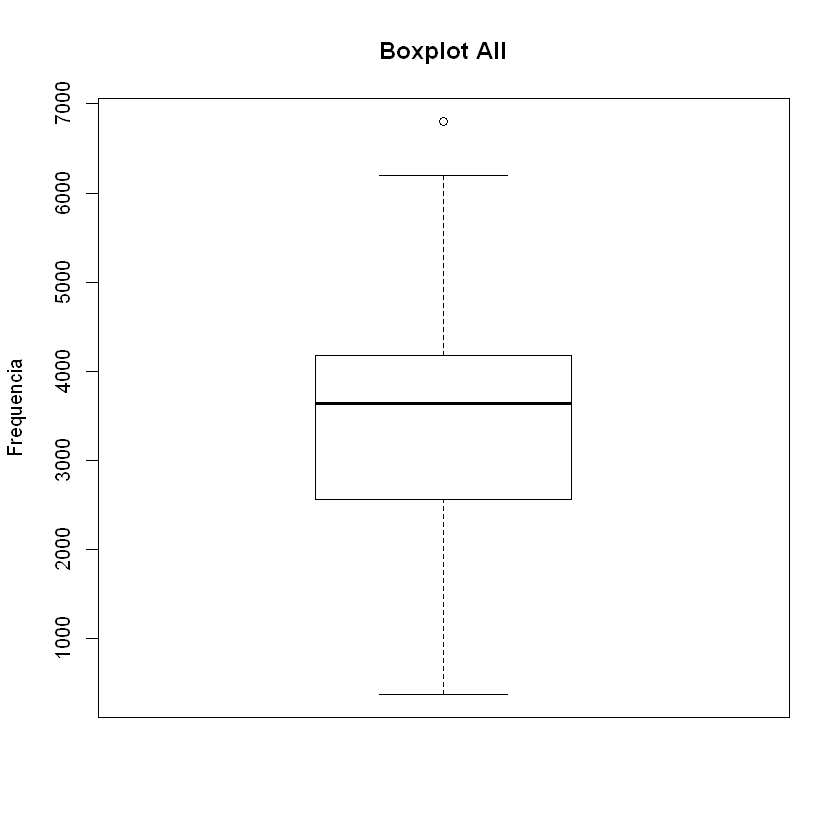

numeric(0)

nº outliers: 0

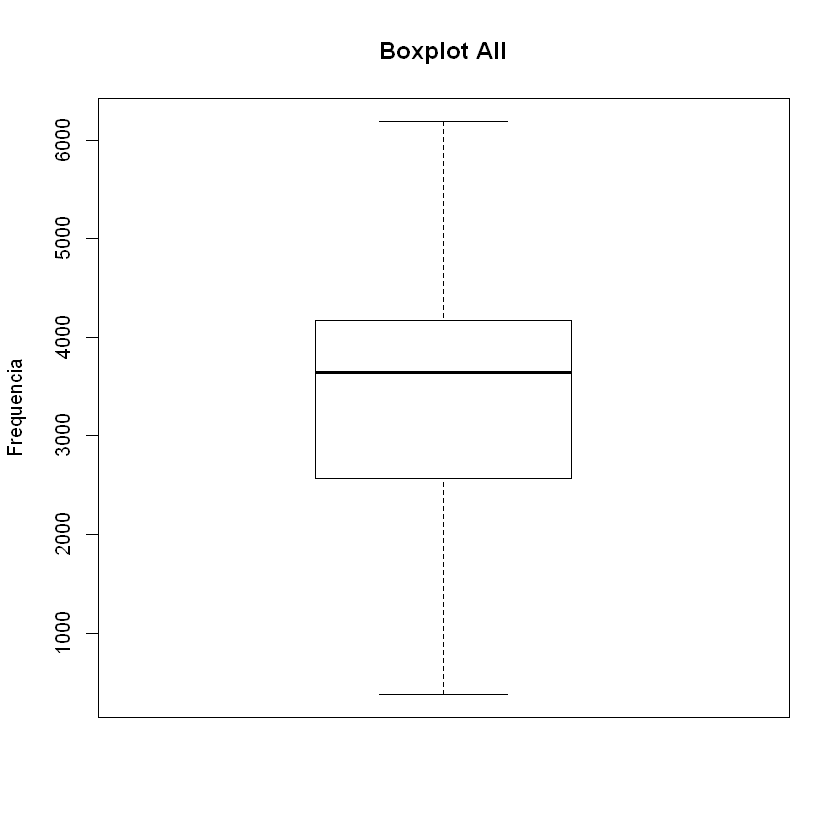

In [82]:
# Cenario 2
summary(data$all)

boxplot(data$all, main="Boxplot All", ylab="Frequencia")$out
cat("nº outliers:",length(boxplot(data$all, main="Boxplot All", ylab="Frequencia")$out))

# ver que obsercações correspondem aos valores de 7961 9371 9163 8300 8270 15735 7719 11110
data[data$all %in% c(7961, 9371, 9163, 8300, 8270, 15735, 7719, 11110),]


# Tratar as observações outliers substituindo pela media (1º run)
data[117,]$all = 3648
data[118,]$all = 3648
data[129,]$all = 3648
data[141,]$all = 3648
data[178,]$all = 3648
data[181,]$all = 3648
data[222,]$all = 3648
data[250,]$all = 3648

boxplot(data$all, main="Boxplot All", ylab="Frequencia")$out
cat("nº outliers:",length(boxplot(data$all, main="Boxplot All", ylab="Frequencia")$out))
data[data$all %in% 6804,]

# Tratar as observações outliers substituindo pela media (2º run)
data[249,]$all = 3648

boxplot(data$all, main="Boxplot All", ylab="Frequencia")$out
cat("nº outliers:",length(boxplot(data$all, main="Boxplot All", ylab="Frequencia")$out))

In [83]:
# Exportar os dados preparados para o seu csv respetivo

#write.csv(data, "./exported data/TS1Cenario1.csv")
write.csv(data, "./exported data/TS1Cenario2.csv")